In [1]:
#ASSIGNMENT 2

In [2]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [3]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

#1. DATA CLEANING

In [4]:
#1.1 data_price_demand

In [5]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [6]:
print(data_price_demand.dtypes)

0     object
1     object
2    float64
3    float64
4     object
dtype: object


In [7]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand', 'Price', 'Type']
data_price_demand.columns = header_names

In [8]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [9]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                object
Date_Time    datetime64[ns]
Demand              float64
Price               float64
Type                 object
dtype: object


In [10]:
# Check for missing value
print(data_price_demand.isnull().sum())

State        0
Date_Time    0
Demand       0
Price        0
Type         0
dtype: int64


In [11]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['2022-11-01T00:30:00.000000000' '2022-11-01T01:00:00.000000000'
 '2022-11-01T01:30:00.000000000' ... '2023-04-23T23:00:00.000000000'
 '2023-04-23T23:30:00.000000000' '2023-04-24T00:00:00.000000000']
'Demand': [4178.18 4086.02 4033.37 ... 4472.49 4621.36 4395.96]
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Type': ['TRADE']


In [12]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [13]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [14]:
sum_of_demand = data_price_demand.groupby('Date')['Demand'].sum().round(2)

In [15]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand, Length: 175, dtype: float64


In [16]:
daily_demand_df = sum_of_demand.reset_index()

In [17]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date     Demand
0    2022-11-01  207429.46
1    2022-11-02  233630.93
2    2022-11-03  235672.34
3    2022-11-04  224895.28
4    2022-11-05  189190.35
..          ...        ...
170  2023-04-20  227925.10
171  2023-04-21  232043.13
172  2023-04-22  207431.82
173  2023-04-23  195560.35
174  2023-04-24    4395.96

[175 rows x 2 columns]


In [18]:
print(daily_demand_df.dtypes)

Date       object
Demand    float64
dtype: object


In [19]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [20]:
print(daily_demand_df.dtypes)

Date      datetime64[ns]
Demand           float64
dtype: object


In [21]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [22]:
#Daily total usage == maximum daily total usage in this assignment

In [23]:
print(data_weather)

                               Location        Date  Minimum temperature (°C)  \
0    Melbourne (Olympic Park), Victoria   1/11/2022                       8.5   
1    Melbourne (Olympic Park), Victoria   2/11/2022                       6.9   
2    Melbourne (Olympic Park), Victoria   3/11/2022                       9.1   
3    Melbourne (Olympic Park), Victoria   4/11/2022                      10.2   
4    Melbourne (Olympic Park), Victoria   5/11/2022                      11.8   
..                                  ...         ...                       ...   
170  Melbourne (Olympic Park), Victoria  20/04/2023                       7.8   
171  Melbourne (Olympic Park), Victoria  21/04/2023                      11.3   
172  Melbourne (Olympic Park), Victoria  22/04/2023                      14.6   
173  Melbourne (Olympic Park), Victoria  23/04/2023                      14.8   
174  Melbourne (Olympic Park), Victoria  24/04/2023                      11.0   

     Maximum temperature (°

In [24]:
data_weather.shape

(175, 22)

In [25]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [26]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [27]:
display(data_weather.head())

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [28]:
# Unique values in each columns to examine value range and current data types in the columns
for column in data_weather.columns:
    unique_values = data_weather[column].unique()
    print(f"'{column}': {unique_values}")

'Location': ['Melbourne (Olympic Park), Victoria']
'Date': ['1/11/2022' '2/11/2022' '3/11/2022' '4/11/2022' '5/11/2022' '6/11/2022'
 '7/11/2022' '8/11/2022' '9/11/2022' '10/11/2022' '11/11/2022'
 '12/11/2022' '13/11/2022' '14/11/2022' '15/11/2022' '16/11/2022'
 '17/11/2022' '18/11/2022' '19/11/2022' '20/11/2022' '21/11/2022'
 '22/11/2022' '23/11/2022' '24/11/2022' '25/11/2022' '26/11/2022'
 '27/11/2022' '28/11/2022' '29/11/2022' '30/11/2022' '1/12/2022'
 '2/12/2022' '3/12/2022' '4/12/2022' '5/12/2022' '6/12/2022' '7/12/2022'
 '8/12/2022' '9/12/2022' '10/12/2022' '11/12/2022' '12/12/2022'
 '13/12/2022' '14/12/2022' '15/12/2022' '16/12/2022' '17/12/2022'
 '18/12/2022' '19/12/2022' '20/12/2022' '21/12/2022' '22/12/2022'
 '23/12/2022' '24/12/2022' '25/12/2022' '26/12/2022' '27/12/2022'
 '28/12/2022' '29/12/2022' '30/12/2022' '31/12/2022' '1/01/2023'
 '2/01/2023' '3/01/2023' '4/01/2023' '5/01/2023' '6/01/2023' '7/01/2023'
 '8/01/2023' '9/01/2023' '10/01/2023' '11/01/2023' '12/01/2023'
 '13/

In [29]:
print(data_weather.dtypes)

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [30]:
# DELETE Location                             
# Date need to be converted into date_time
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# 9am wind speed (km/h) needs to be changed into int, also need to change the 'Calm' note into value
# DELETE 3pm wind direction

In [31]:
data_weather.drop(columns=['Location', 'Direction of maximum wind gust ', 'Time of maximum wind gust', '9am wind direction', '3pm wind direction'], inplace=True)

In [32]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/11/2022,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2/11/2022,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,3/11/2022,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,4/11/2022,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,5/11/2022,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [33]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [34]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [35]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [36]:
#Clean 9am wind speed (km/h). Count value in the column:
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
11      17
6       17
15      10
Calm     9
4        8
17       5
2        4
20       3
19       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [37]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [38]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
11    17
6     17
15    10
0      9
4      8
17     5
2      4
20     3
19     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [39]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [40]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [41]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [42]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


In [43]:
# Replace the missing value of line 174 with column's mean value
# for column in data_weather.columns:
   # column_mean = data_weather[column].mean()
   # data_weather[column].fillna(column_mean, inplace=True)

# This section was recoded after visually identifying an outlier in "Demand" boxplot.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [44]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [45]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [46]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [47]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [48]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand                                      float64
dtype: object


In [49]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

## 2. DATA ANALYSIS - DESCRIPTIVE ANALYSIS ##

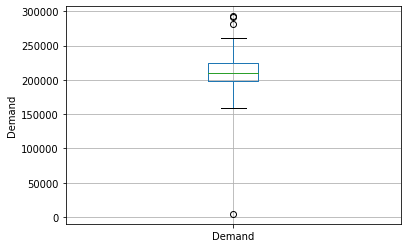

In [50]:
# Use Box plot to identify outliers in dependant "Demand"
daily_demand_df.boxplot(column='Demand')
plt.ylabel('Demand')
plt.show()

In [170]:
# Single point of outlier identified. Re-coded data_weather dataframe to drop that datapoint.

In [52]:
# Use scatterplots to visually analyse different weather data against Demand

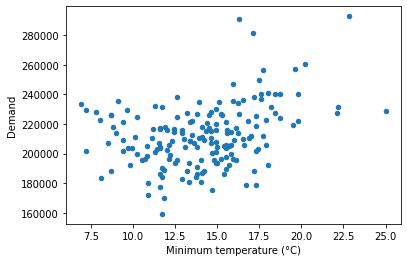

In [53]:
# Scatterplot 1a to visualise Demand vs Minimum Temperature
weather_demand_df.plot(x='Minimum temperature (°C)', y='Demand', kind='scatter')

plt.show()

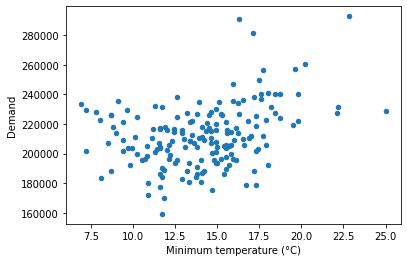

In [54]:
# Scatterplot 1 to visualise Demand vs Minimum Temperature
weather_demand_df.plot(x='Minimum temperature (°C)', y='Demand', kind='scatter')

plt.show()

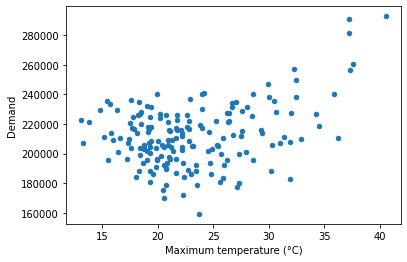

In [55]:
# Scatterplot 2 to visualise Demand vs Maximum Temperature
weather_demand_df.plot(x='Maximum temperature (°C)', y='Demand', kind='scatter')

plt.show()

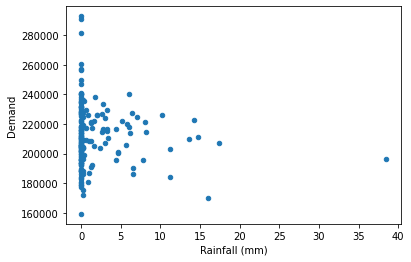

In [56]:
# Scatterplot 3 to visualise Demand vs Rainfall (mm)
weather_demand_df.plot(x='Rainfall (mm)', y='Demand', kind='scatter')

plt.show()

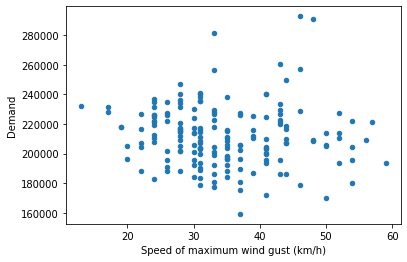

In [57]:
# Scatterplot 4 to visualise Demand vs Maximum wind gust
weather_demand_df.plot(x='Speed of maximum wind gust (km/h)', y='Demand', kind='scatter')

plt.show()

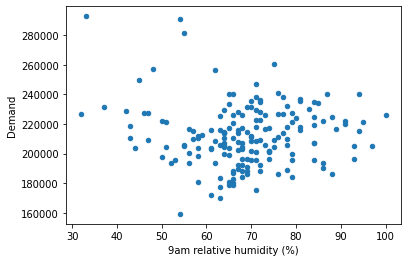

In [58]:
# Scatterplot 5 to visualise Demand vs Humidity (9am)
weather_demand_df.plot(x='9am relative humidity (%)', y='Demand', kind='scatter')

plt.show()

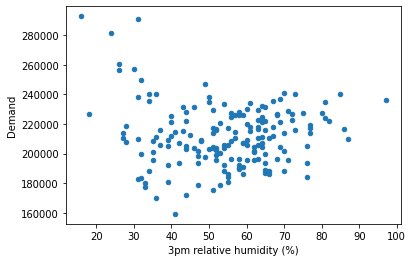

In [59]:
# Scatterplot 6 to visualise Demand vs Humidity (3pm)
weather_demand_df.plot(x='3pm relative humidity (%)', y='Demand', kind='scatter')

plt.show()

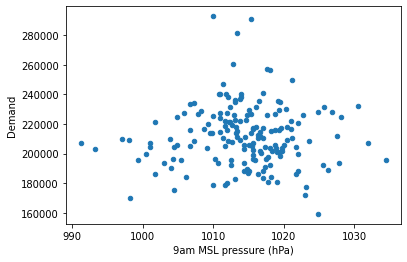

In [60]:
# Scatterplot 7 to visualise Demand vs Pressure (9am)
weather_demand_df.plot(x='9am MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

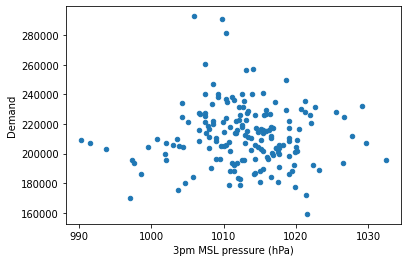

In [61]:
# Scatterplot 8 to visualise Demand vs Pressure (3pm)
weather_demand_df.plot(x='3pm MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

In [62]:
# Add a new column 'Average_Temp_9am_3pm' which is the average of '9am Temperature (°C)' and '3pm Temperature (°C)'
weather_demand_df['Average_Temp_9am_3pm'] = weather_demand_df[['9am Temperature (°C)', '3pm Temperature (°C)']].mean(axis=1)

# Check the updated dataframe
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40


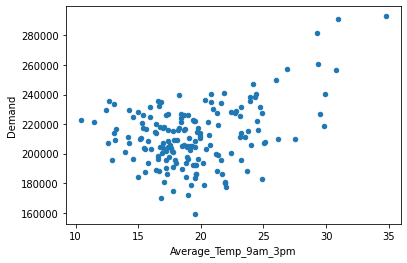

In [63]:
# Scatter plot for 'Average_Temp_9am_3pm' and 'Demand'
weather_demand_df.plot(x='Average_Temp_9am_3pm', y='Demand', kind='scatter')

plt.show()

In [64]:
# Calculate 24-hour moving average for 'Demand'
weather_demand_df['Demand_MA_24'] = weather_demand_df['Demand'].rolling(window=24).mean()

# Check the dataframe
weather_demand_df.head(30)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,33.0,4.0,1019.9,177519.43,22.05,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,66.0,9.0,1019.1,210721.33,19.95,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,43.0,6.0,1015.9,215059.09,23.80,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,37.0,13.0,1015.4,216235.49,24.55,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,44.0,20.0,1011.7,222350.10,24.45,NaN


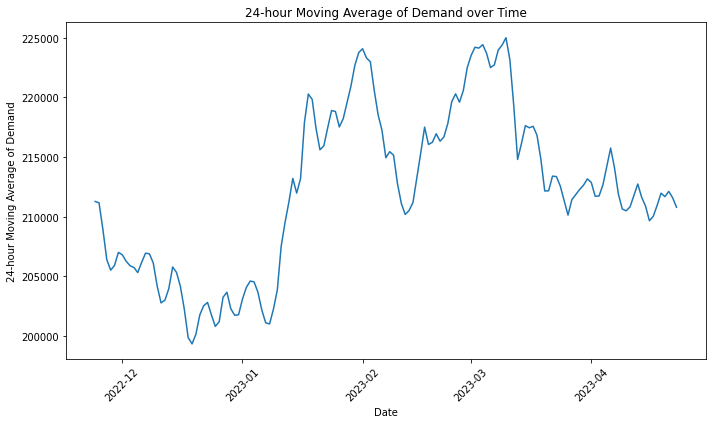

In [65]:
# Line graph for 'Demand_MA_24' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['Demand_MA_24'])
plt.title('24-hour Moving Average of Demand over Time')
plt.xlabel('Date')
plt.ylabel('24-hour Moving Average of Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [66]:
# Calculate 7-day moving average for 'Demand'
weather_demand_df['Demand_MA_7'] = weather_demand_df['Demand'].rolling(window=7).mean()

# Check the dataframe
weather_demand_df.head(10)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24,Demand_MA_7
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60,NaN,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05,NaN,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65,NaN,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60,NaN,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40,NaN,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,33.0,4.0,1019.9,177519.43,22.05,NaN,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,66.0,9.0,1019.1,210721.33,19.95,NaN,211294.160000
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,43.0,6.0,1015.9,215059.09,23.80,NaN,212384.107143
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,37.0,13.0,1015.4,216235.49,24.55,NaN,209899.044286
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,44.0,20.0,1011.7,222350.10,24.45,NaN,207995.867143


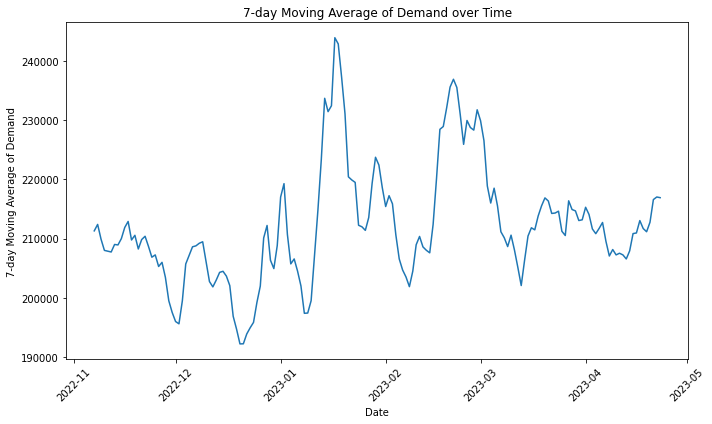

In [67]:
# Line graph for 'Demand_MA_7' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['Demand_MA_7'])
plt.title('7-day Moving Average of Demand over Time')
plt.xlabel('Date')
plt.ylabel('7-day Moving Average of Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [68]:
# Assuming each week has 7 days, a 4-week moving average will have a window of 4*7 = 28 days

# Calculate 4-week moving average for 'Demand'
weather_demand_df['Demand_MA_4week'] = weather_demand_df['Demand'].rolling(window=28).mean()

# Check the dataframe
weather_demand_df.head(30)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24,Demand_MA_7,Demand_MA_4week
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60,NaN,NaN,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05,NaN,NaN,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65,NaN,NaN,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60,NaN,NaN,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40,NaN,NaN,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,33.0,4.0,1019.9,177519.43,22.05,NaN,NaN,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,66.0,9.0,1019.1,210721.33,19.95,NaN,211294.160000,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,43.0,6.0,1015.9,215059.09,23.80,NaN,212384.107143,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,37.0,13.0,1015.4,216235.49,24.55,NaN,209899.044286,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,44.0,20.0,1011.7,222350.10,24.45,NaN,207995.867143,NaN


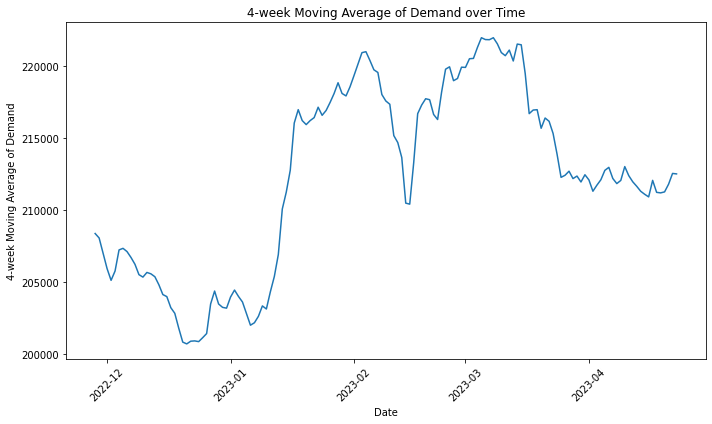

In [69]:
# Line graph for 'Demand_MA_4week' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['Demand_MA_4week'])
plt.title('4-week Moving Average of Demand over Time')
plt.xlabel('Date')
plt.ylabel('4-week Moving Average of Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [70]:
# Calculate 4-week moving average for '9am Temperature (°C)'
weather_demand_df['9am_Temp_MA_4week'] = weather_demand_df['9am Temperature (°C)'].rolling(window=28).mean()

# Check the dataframe
weather_demand_df.head(30)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24,Demand_MA_7,Demand_MA_4week,9am_Temp_MA_4week
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60,NaN,NaN,NaN,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05,NaN,NaN,NaN,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65,NaN,NaN,NaN,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60,NaN,NaN,NaN,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40,NaN,NaN,NaN,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,33.0,4.0,1019.9,177519.43,22.05,NaN,NaN,NaN,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,66.0,9.0,1019.1,210721.33,19.95,NaN,211294.160000,NaN,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,43.0,6.0,1015.9,215059.09,23.80,NaN,212384.107143,NaN,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,37.0,13.0,1015.4,216235.49,24.55,NaN,209899.044286,NaN,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,44.0,20.0,1011.7,222350.10,24.45,NaN,207995.867143,NaN,NaN


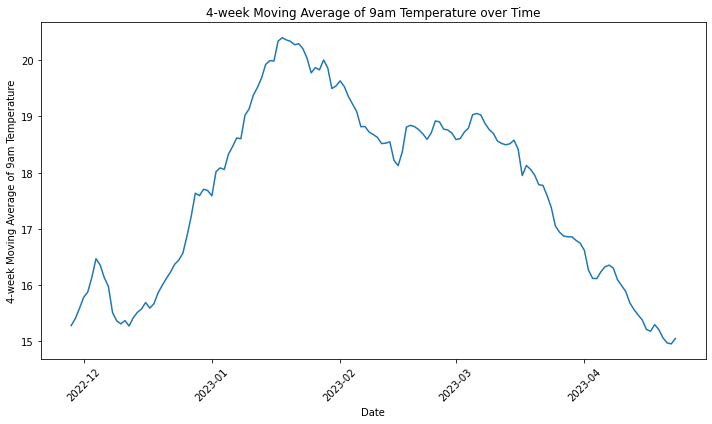

In [71]:
# Line graph for '9am_Temp_MA_4week' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['9am_Temp_MA_4week'])
plt.title('4-week Moving Average of 9am Temperature over Time')
plt.xlabel('Date')
plt.ylabel('4-week Moving Average of 9am Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [72]:
# Calculate 4-week moving average for 'Average_Temp_9am_3pm'
weather_demand_df['Avg_Temp_9am_3pm_MA_4week'] = weather_demand_df['Average_Temp_9am_3pm'].rolling(window=28).mean()

# Check the dataframe
weather_demand_df.head(30)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24,Demand_MA_7,Demand_MA_4week,9am_Temp_MA_4week,Avg_Temp_9am_3pm_MA_4week
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60,NaN,NaN,NaN,NaN,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05,NaN,NaN,NaN,NaN,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65,NaN,NaN,NaN,NaN,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60,NaN,NaN,NaN,NaN,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40,NaN,NaN,NaN,NaN,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,33.0,4.0,1019.9,177519.43,22.05,NaN,NaN,NaN,NaN,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,66.0,9.0,1019.1,210721.33,19.95,NaN,211294.160000,NaN,NaN,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,43.0,6.0,1015.9,215059.09,23.80,NaN,212384.107143,NaN,NaN,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,37.0,13.0,1015.4,216235.49,24.55,NaN,209899.044286,NaN,NaN,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,44.0,20.0,1011.7,222350.10,24.45,NaN,207995.867143,NaN,NaN,NaN


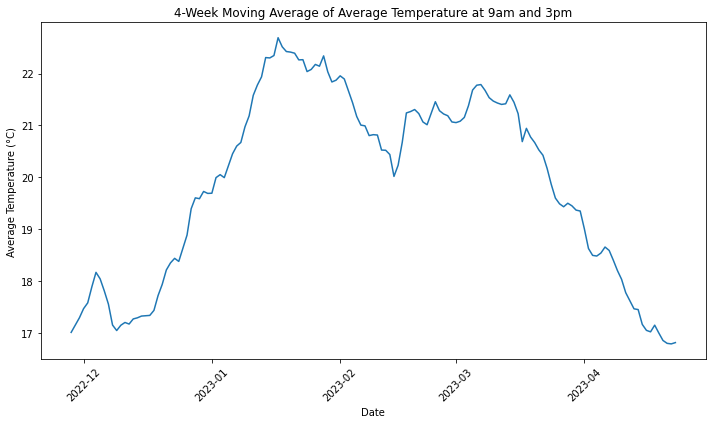

In [73]:
# Create a line graph for 'Avg_Temp_9am_3pm_MA_4week'
plt.figure(figsize=(10,6))
plt.plot(weather_demand_df['Date'], weather_demand_df['Avg_Temp_9am_3pm_MA_4week'])
plt.title('4-Week Moving Average of Average Temperature at 9am and 3pm')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [171]:
# Calculate the correlation coefficient for 'Avg_Temp_9am_3pm_MA_4week' and 'Demand_MA_4week'
correlation = weather_demand_df[['Avg_Temp_9am_3pm_MA_4week', 'Demand_MA_4week']].corr()

correlation

,Avg_Temp_9am_3pm_MA_4week,Demand_MA_4week
Avg_Temp_9am_3pm_MA_4week,1.00000,0.61171
Demand_MA_4week,0.61171,1.00000


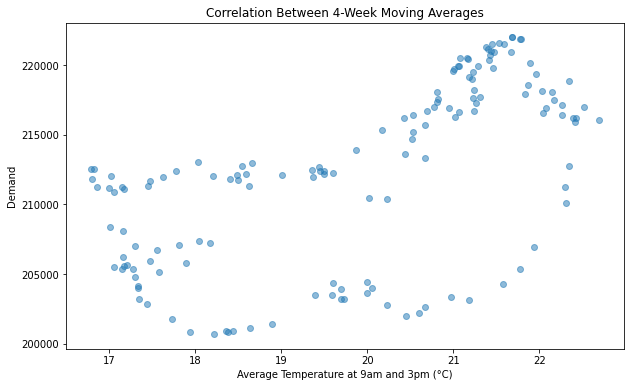

In [75]:
# Scatter plot of 'Avg_Temp_9am_3pm_MA_4week' and 'Demand_MA_4week'
plt.figure(figsize=(10, 6))
plt.scatter(weather_demand_df['Avg_Temp_9am_3pm_MA_4week'], weather_demand_df['Demand_MA_4week'], alpha=0.5)
plt.title('Correlation Between 4-Week Moving Averages')
plt.xlabel('Average Temperature at 9am and 3pm (°C)')
plt.ylabel('Demand')
plt.show()


In [76]:
# the positive correlation of 0.61171 suggests that there is a moderate positive relationship between the 4-week moving averages of the average temperature at 9 am and 3 pm and demand
# The plot shows a general upward trend, suggesting a positive correlation between these two variables. However, there is still quite a bit of spread in the points, indicating that there is variation in demand that isn't fully explained by the average temperature.

In [77]:
# Calculate 4-week moving average for '9am relative humidity (%)'
weather_demand_df['9am_RH_MA_4week'] = weather_demand_df['9am relative humidity (%)'].rolling(window=28).mean()

# Calculate 4-week moving average for '3pm relative humidity (%)'
weather_demand_df['3pm_RH_MA_4week'] = weather_demand_df['3pm relative humidity (%)'].rolling(window=28).mean()

# Check the dataframe
weather_demand_df.head(30)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),...,3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm,Demand_MA_24,Demand_MA_7,Demand_MA_4week,9am_Temp_MA_4week,Avg_Temp_9am_3pm_MA_4week,9am_RH_MA_4week,3pm_RH_MA_4week
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,...,991.5,207429.46,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,...,1008.4,233630.93,13.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,...,1021.3,235672.34,12.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,...,1026.6,224895.28,14.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,...,1023.2,189190.35,16.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,...,1019.9,177519.43,22.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,...,1019.1,210721.33,19.95,NaN,211294.160000,NaN,NaN,NaN,NaN,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,...,1015.9,215059.09,23.80,NaN,212384.107143,NaN,NaN,NaN,NaN,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,...,1015.4,216235.49,24.55,NaN,209899.044286,NaN,NaN,NaN,NaN,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,...,1011.7,222350.10,24.45,NaN,207995.867143,NaN,NaN,NaN,NaN,NaN


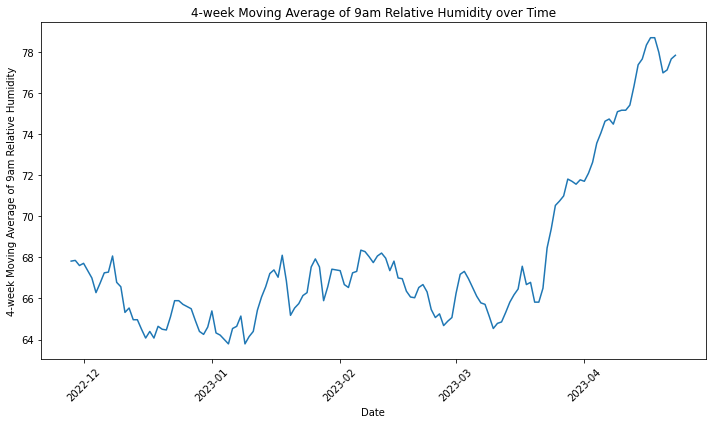

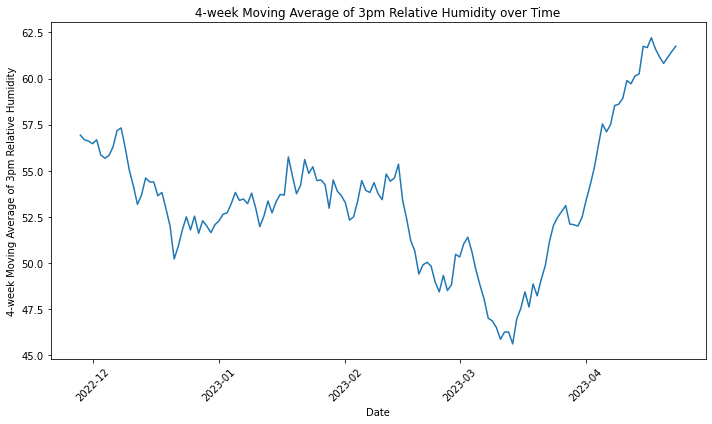

In [78]:
# Line graph for '9am_RH_MA_4week' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['9am_RH_MA_4week'])
plt.title('4-week Moving Average of 9am Relative Humidity over Time')
plt.xlabel('Date')
plt.ylabel('4-week Moving Average of 9am Relative Humidity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

# Line graph for '3pm_RH_MA_4week' over time
plt.figure(figsize=(10, 6))
plt.plot(weather_demand_df['Date'], weather_demand_df['3pm_RH_MA_4week'])
plt.title('4-week Moving Average of 3pm Relative Humidity over Time')
plt.xlabel('Date')
plt.ylabel('4-week Moving Average of 3pm Relative Humidity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [79]:
# Calculate the correlation between 'Demand_MA_4week' and '9am_RH_MA_4week'
correlation_9am_RH = weather_demand_df['Demand_MA_4week'].corr(weather_demand_df['9am_RH_MA_4week'])

# Calculate the correlation between 'Demand_MA_4week' and '3pm_RH_MA_4week'
correlation_3pm_RH = weather_demand_df['Demand_MA_4week'].corr(weather_demand_df['3pm_RH_MA_4week'])

correlation_9am_RH, correlation_3pm_RH

(0.09713446407277573, -0.33316140565890157)

In [80]:
# The correlation coefficient for 4 week moving average of 9am Relative Humidity and 4 week moving average of 9am demand is 0.09713446407277573, which suggests a very weak positive linear relationship between the two variables. 
# The correlation coefficient for 4 week moving average of 3pm Relative Humidity and 4 week moving average of 3pm demand is -0.33316140565890157 indicates a weak to moderate negative linear relationship.

## 3. PREDICTIVE ANALYTICS ##

In [81]:
## LINEAR REGRESSION ##

In [82]:
#linear regression '9am Temperature (°C)' and 'Demand'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('9am Temperature (°C)') and the target variable ('Demand')
X = weather_demand_df[['9am Temperature (°C)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(330815479.40671337, -0.03377239339416627)

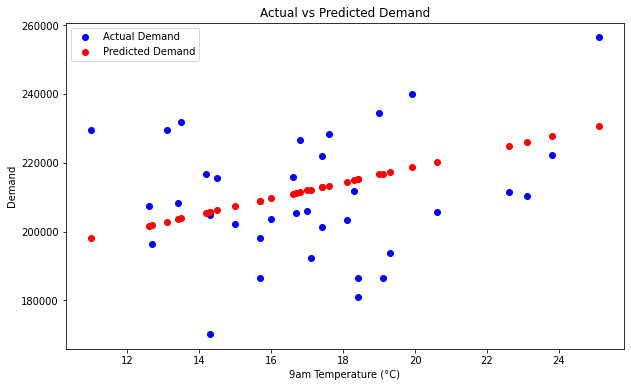

In [83]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('9am Temperature (°C)')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [84]:
# The R-squared statistic is approximately -0.0338. The R-squared statistic provides a measure of how well future samples are likely to be predicted by the model. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of 'Demand', disregarding the input features, would get a R-squared score of 0.0.
# In this context, a negative R-squared value indicates that the model is performing worse than a model that always predicts the average demand, regardless of the 9am temperature. This suggests that the 9am temperature alone is not a good predictor of demand, at least not with a linear model.

In [85]:
#linear regression with 4 week moving average of average temp as the predictor variable and 4 week moving average of demand variable as the target variable.

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('Avg_Temp_9am_3pm_MA_4week') and the target variable ('Demand_MA_4week')
X = weather_demand_df[['Avg_Temp_9am_3pm_MA_4week']]
y = weather_demand_df['Demand_MA_4week']

# Drop rows with NaN values
X = X.dropna()
y = y.dropna()

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(22684251.076184608, 0.5056059806744946)

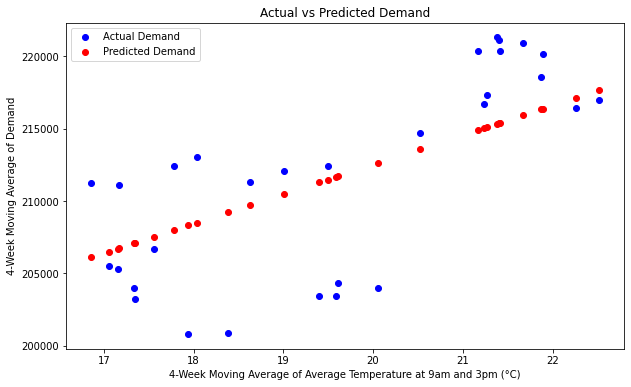

In [86]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('4-Week Moving Average of Average Temperature at 9am and 3pm (°C)')
plt.ylabel('4-Week Moving Average of Demand')
plt.legend()
plt.show()

In [87]:
#The The R² of 0.5056 suggests a moderate correlation between demand and the average temperature at 9 am and 3 pm
#However, there is still quite a bit of spread in the points, indicating that there is variation in demand that isn't fully explained by the average temperature. 

In [88]:
#linear regression with 9am relative humidity as the predictor variable and demand as the target variable.

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('9am relative humidity (%)') and the target variable ('Demand')
X = weather_demand_df[['9am relative humidity (%)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(337636337.27976614, -0.05508703858874098)

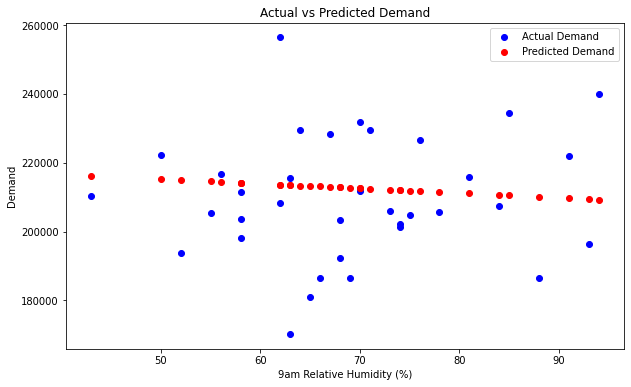

In [89]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('9am Relative Humidity (%)')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [90]:
# -0.05508703858874098 suggests that using '9am relative humidity' as a predictor for 'Demand' in a simple Linear Regression model does not provide a good fit

In [91]:
# the model is performing worse than a model that always predicts the average demand, regardless of the 3pm relative humidity. This suggests that the 3pm relative humidity alone is not a good predictor of demand, at least not with a linear model.

In [92]:
#decision tree 9 am temperature and demand

from sklearn.tree import DecisionTreeRegressor

# Define the predictor variable ('9am Temperature (°C)') and the target variable ('Demand')
X = weather_demand_df[['9am Temperature (°C)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(643052421.7243112, -1.0094883174029778)

In [93]:
# a negative R-squared value indicates that the model is performing much worse than a model that always predicts the average demand, regardless of the 9am temperature. This suggests that the 9am temperature alone is not a good predictor of demand, at least not with a decision tree model.

In [94]:
## DECISION TREE

In [95]:
# decision tree Average temp and Demand
# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(437138713.5449906, -0.3660241502516619)

In [96]:
# a negative R-squared value of -0.3660241502516619 indicates that the model is performing much worse than a model that always predicts the average demand, regardless of the 9am relative humidity. This suggests that the 9am relative humidity alone is not a good predictor of demand, at least not with a decision tree model.

In [97]:
## RANDOM FOREST

In [98]:
#random forest avg temp vs demand

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(311452203.16572285, 0.026736324213305185)

In [99]:
# A negative R-squared value of 0.026736324213305185 quite low, suggesting that the model does not explain much of the variability in the 'Demand'

In [100]:
 # a negative R-squared value of -0.35053521766526563 indicates that the model is performing worse than a model that always predicts the average demand, regardless of the 9am relative humidity. 

In [101]:
#KNN NEAREST NEIGHBOUR

In [102]:
#knn avg temp vs demand

from sklearn.neighbors import KNeighborsRegressor

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(311865536.31703126, 0.02544469057553367)

In [103]:
# 0.02544469057553367 is quite low, suggesting that the model does not explain much of the variability in the 'Demand'.

In [104]:
## POLYNOMIAL REGRESSION

In [105]:
#Polynomial Regression average temperature vs demand

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Transform the predictor variable to a polynomial of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(261325142.57108444, 0.1833794519704104)

In [106]:
# 0.1833794519704104 is low, suggesting that the model does not explain much of the variability in the 'Demand'.

In [107]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

In [108]:
## ENTROPY

In [109]:
#Use entrophy to check which humidity dataset (9am or 3pm) has less unpredictability
entrophy_3pmHumid = entropy(weather_demand_df['3pm relative humidity (%)'])
print("Entropy of 3pm:", entrophy_3pmHumid)

entrophy_9amHumid = entropy(weather_demand_df['9am relative humidity (%)'])
print("Entropy of 9am:", entrophy_9amHumid)

Entropy of 3pm: 5.118381451486226
Entropy of 9am: 5.142247475557651


In [110]:
# Both Entrophy values are very similar. For Humidity, decide to use 3pm Humidity dataset as it has slightly lower entrophy

In [111]:
# As dataset is summer-spring season. Decide to use Maximum Temperature dataset to analyse temperature

In [112]:
# Determine to use Maximum temperature and Humidity for further analysis. 
# Create new dataframe with these data only

In [113]:
# Extract the Maximum temperature (°C), 3pm relative humidity (%) columns from the weather_demand_df

new_columns = ['Date', 'Maximum temperature (°C)', '3pm relative humidity (%)', 'Demand']

# Create a new DataFrame with the selected columns
temp_humidity_df = weather_demand_df[new_columns].copy()

print(temp_humidity_df)

          Date  Maximum temperature (°C)  3pm relative humidity (%)     Demand
0   2022-11-01                      13.3                       59.0  207429.46
1   2022-11-02                      15.7                       54.0  233630.93
2   2022-11-03                      15.4                       67.0  235672.34
3   2022-11-04                      17.8                       56.0  224895.28
4   2022-11-05                      22.7                       65.0  189190.35
..         ...                       ...                        ...        ...
169 2023-04-19                      17.5                       53.0  220897.61
170 2023-04-20                      18.5                       58.0  227925.10
171 2023-04-21                      19.0                       64.0  232043.13
172 2023-04-22                      19.2                       64.0  207431.82
173 2023-04-23                      19.0                       71.0  195560.35

[174 rows x 4 columns]


In [114]:
# Convert Demand data into smaller number
temp_humidity_df['Demand'] = temp_humidity_df['Demand'].divide(1000).round(2)

# Change the Demand column's header to indicate measurement of Gigawatt (GW) instead of Megawatt (MW)

temp_humid_demand_df = temp_humidity_df.rename(columns={'Demand': 'Demand (GW)'})

print(temp_humid_demand_df)

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  
0         207.43  
1         233.63  
2         235.67  
3         224.90  
4         189.19  
..           ...  
169       220.

In [115]:
# Identify and remove any outliers using z-scores.

def remove_outliers(temp_humid_demand_df, column_name, z_threshold=3):
    """ Standardise data by finding the z-score. 
    z_threshold is the limit set where data is deemed too far from standard mean. 
    Remove outliers and return new dataframe """
    
    # Calculate the z-score for the column
    z_scores = (temp_humid_demand_df[column_name] - temp_humid_demand_df[column_name].mean()) / temp_humid_demand_df[column_name].std()
    
    # Filter out the outliers and return the cleaned DataFrame
    cleaned_data = temp_humid_demand_df[abs(z_scores) < z_threshold]
    return cleaned_data


In [116]:
# Remove outliers in Maximum Temperature and return to temp_humid_demand_df
temp_humid_demand_df = remove_outliers(temp_humid_demand_df, 'Maximum temperature (°C)')

# Check number of data points remaining after removal of Maximum Temperature outliers
print("Number of rows, column:", temp_humid_demand_df.shape)

Number of rows, column: (173, 4)


In [117]:
# One outlier is removed from dataset

In [118]:
# Remove outliers in Maximum Temperature and return to temp_humid_demand_df
temp_humid_demand_df = remove_outliers(temp_humid_demand_df, '3pm relative humidity (%)')

# Check number of data points remaining after removal of outliers
print("Number of rows, column:", temp_humid_demand_df.shape)

Number of rows, column: (173, 4)


In [119]:
# There are no outliers outside the threshold in humidity dataset. No data was removed.

In [120]:
# Use Freedman-Diaconis Rule to determine number of bins required for Maximum temperature data
# Calculate the bin size
temp_iqr = temp_humid_demand_df['Maximum temperature (°C)'].quantile(0.75) - temp_humid_demand_df['Maximum temperature (°C)'].quantile(0.25)
temp_bin_size = 2 * temp_iqr / (len(temp_humid_demand_df['Maximum temperature (°C)']) ** (1/3))

# Calculate the number of bins based on the bin size and the data range
data_min = temp_humid_demand_df['Maximum temperature (°C)'].min()
data_max = temp_humid_demand_df['Maximum temperature (°C)'].max()
num_bins = int((data_max - data_min) / temp_bin_size)

print("Number of Maximum temperature bins:", num_bins)

Number of Maximum temperature bins: 9


In [121]:
# Discretise Maximum temperature into 9 equal length bins
temp_humid_demand_df['Maximum temperature_bins'] = pd.cut(temp_humid_demand_df['Maximum temperature (°C)'], bins=9, labels=False)

# Print the DataFrame and the unique bins
print(temp_humid_demand_df)
print("Unique Bins:", temp_humid_demand_df['Maximum temperature_bins'].unique())

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  Maximum temperature_bins  
0         207.43                         0  
1         233.63                         0  
2         23

In [122]:
# Count the number of datapoints in each bin
bin_counts = temp_humid_demand_df['Maximum temperature_bins'].value_counts()

print(bin_counts)

2    47
3    32
4    24
1    23
5    15
6    11
0     9
8     6
7     6
Name: Maximum temperature_bins, dtype: int64


In [123]:
# Calculate NMI between Maximum temperature and Demand
nmi_temp = normalized_mutual_info_score(temp_humid_demand_df['Maximum temperature_bins'], temp_humid_demand_df['Demand (GW)'])
print("NMI of Maximum temperature and Demand:", nmi_temp)

# Calculate entropy of Maximum temperature
entrophy_temp = entropy(temp_humid_demand_df['Maximum temperature (°C)'])
print("Entropy of Maximum temperature:", entrophy_temp)

# Calculate entropy of Maximum temperature
entrophy_temp = entropy(temp_humid_demand_df['Maximum temperature_bins'])
print("Entropy of Maximum temperature bins:", entrophy_temp)

NMI of Maximum temperature and Demand: 0.552425523587424
Entropy of Maximum temperature: 5.128165149177319
Entropy of Maximum temperature bins: 4.950435321012306


In [124]:
# Use Freedman-Diaconis Rule to determine number of bins required for 3pm Humidity data
# Calculate the bin size
Humid_iqr = temp_humid_demand_df['3pm relative humidity (%)'].quantile(0.75) - temp_humid_demand_df['3pm relative humidity (%)'].quantile(0.25)
Humid_bin_size = 2 * Humid_iqr / (len(temp_humid_demand_df['3pm relative humidity (%)']) ** (1/3))

# Calculate the number of bins based on the bin size and the 3pm humididty data range
data_min = temp_humid_demand_df['3pm relative humidity (%)'].min()
data_max = temp_humid_demand_df['3pm relative humidity (%)'].max()
num_bins = int((data_max - data_min) / Humid_bin_size)

# Print the DataFrame and the number of bins
print("Number of Bins:", num_bins)

Number of Bins: 10


In [125]:
# Discretise 3pm Humidity into 10 equal length bins
temp_humid_demand_df['3pm humidity bins'] = pd.cut(temp_humid_demand_df['3pm relative humidity (%)'], bins=10, labels=False)

# Print the unique bins
print(temp_humid_demand_df)
print("Unique Bins:", temp_humid_demand_df['3pm relative humidity (%)'].unique())

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  Maximum temperature_bins  3pm humidity bins  
0         207.43                         0                  5  
1         233.63   

In [126]:
# Count the number of datapoints in each bin
bin_counts = temp_humid_demand_df['Maximum temperature_bins'].value_counts()

print(bin_counts)

2    47
3    32
4    24
1    23
5    15
6    11
0     9
8     6
7     6
Name: Maximum temperature_bins, dtype: int64


In [127]:
# Calculate NMI between Humidity bins and Demand
nmi_humidity = normalized_mutual_info_score(temp_humid_demand_df['3pm humidity bins'], temp_humid_demand_df['Demand (GW)'])
print("NMI of 3pm Humidity bins and Demand:", nmi_humidity)

# Calculate entropy of 3pm humidity
entropy_humidity = entropy(temp_humid_demand_df['3pm relative humidity (%)'])
print("Entropy of 3pm Humidity:", entropy_humidity)

# Calculate entropy of 3pm humidity bins
entropy_humiditybins = entropy(temp_humid_demand_df['3pm humidity bins'])
print("Entropy of 3pm Humidity bins:", entropy_humiditybins)


NMI of 3pm Humidity bins and Demand: 0.5549159539917906
Entropy of 3pm Humidity: 5.114544740772543
Entropy of 3pm Humidity bins: 5.040356215596787


In [128]:
# Use Freedman-Diaconis Rule to determine number of bins required for Average_Temp_9am_3pm data
# Calculate the bin size
temp_iqr = weather_demand_df['Average_Temp_9am_3pm'].quantile(0.75) - weather_demand_df['Average_Temp_9am_3pm'].quantile(0.25)
temp_bin_size = 2 * temp_iqr / (len(weather_demand_df['Average_Temp_9am_3pm']) ** (1/3))

# Calculate the number of bins based on the bin size and the data range
data_min = weather_demand_df['Average_Temp_9am_3pm'].min()
data_max = weather_demand_df['Average_Temp_9am_3pm'].max()
num_bins = int((data_max - data_min) / temp_bin_size)

print("Number of Average_Temp_9am_3pm bins:", num_bins)

Number of Average_Temp_9am_3pm bins: 14


In [159]:
# Discretise Average_Temp_9am_3pm into 14 equal length bins
weather_demand_df['Ave_Temp_9am_3pmbins'] = pd.cut(weather_demand_df['Average_Temp_9am_3pm'], bins=14, labels=False)

# Print the unique bins
print("Unique Bins:", weather_demand_df['Average_Temp_9am_3pm'].unique())

Unique Bins: [12.6  13.05 12.65 14.6  16.4  22.05 19.95 23.8  24.55 24.45 18.45 16.65
 21.7  15.15 10.45 12.45 14.3  17.25 18.8  16.85 11.5  15.35 15.4  15.65
 16.75 21.9  17.75 16.05 16.6  16.95 17.55 17.7  25.05 29.85 16.45 17.35
 17.4  13.15 15.5  19.5  23.2  13.2  15.25 17.45 18.95 19.55 21.35 19.45
 19.2  20.25 24.9  23.1  30.8  22.8  17.1  21.6  24.   29.95 24.85 15.8
 19.6  23.65 25.15 22.75 19.05 24.15 20.8  21.85 29.35 19.35 30.95 18.3
 16.9  18.9  19.65 21.3  23.2  24.4  23.95 19.8  20.65 29.55 21.4  19.9
 18.15 17.9  15.55 17.2  18.1  18.65 21.65 21.25 19.25 18.5  19.15 24.3
 29.25 34.75 20.4  22.4  21.   22.45 26.   26.85 24.7  18.4  16.55 17.8
 17.6  23.5  26.2  20.7  19.   19.8  20.2  18.85 20.3  19.7  27.55 18.
 15.95 18.25 17.3  16.8  16.35 13.95 17.   20.6  17.95 14.95 12.9  14.15
 15.95 18.75 19.3  14.55 15.3  16.7 ]


In [158]:
# Count the number of datapoints in each bin
bin_counts = weather_demand_df['Ave_Temp_9am_3pmbins'].value_counts()
print(bin_counts)

4     35
5     31
3     31
2     17
7     15
6     15
8      9
1      8
11     5
9      3
10     2
0      2
13     1
Name: Ave_Temp_9am_3pmbins, dtype: int64


In [155]:
# Calculate NMI between Average_Temp_9am_3pm and Demand
nmi_Ave_Temp_9am_3pm = normalized_mutual_info_score(weather_demand_df['Ave_Temp_9am_3pmbins'], weather_demand_df['Demand'])
print("NMI of Average temperature bins and Demand:", nmi_Ave_Temp_9am_3pm)

NMI of Average temperature bins and Demand: 0.595268766692348
